# Importing Libraries

In [1]:
from skfuzzy import control as ctrl
import skfuzzy as fuzz

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import sys

In [2]:
import warnings

warnings.filterwarnings(action="ignore",
                        category=UserWarning,
                        module="skfuzzy")

# Configuring Visualization Parameters

In [3]:
%matplotlib inline

In [4]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [5]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI
}

mpl.rcParams.update(custom_params)

# Pre-installing Custom Functions

In [6]:
sys.path.append("../")

In [7]:
from Modules import *

# Practicing in Stages

## *Antecedents and consequent

In [8]:
food = ctrl.Antecedent(np.arange(0, 11, 1), "food")
service = ctrl.Antecedent(np.arange(0, 11, 1), "service")

tabulation = Form_Generator()
tabulation.heading_printer("Antecedents")

statements = [
    """
food = ctrl.Antecedent(np.arange(0, 11, 1), "food")
service = ctrl.Antecedent(np.arange(0, 11, 1), "service")
"""
]
tabulation.statement_generator(statements)

variables = ["food", "service"]
values = [str(food), str(service)]
tabulation.variable_generator(variables, values)

expressions = ["food.universe", "service.universe"]
results = [str(food.universe), str(service.universe)]
tabulation.expression_generator(expressions, results)

Antecedents

    +-----------------------------------------------------------+
    | Statement                                                 |
    +-----------------------------------------------------------+
    | food = ctrl.Antecedent(np.arange(0, 11, 1), "food")       |
    | service = ctrl.Antecedent(np.arange(0, 11, 1), "service") |
    +-----------------------------------------------------------+
    +----------+---------------------+
    | Variable | Value               |
    +----------+---------------------+
    | food     | Antecedent: food    |
    | service  | Antecedent: service |
    +----------+---------------------+
    +------------------+------------------------------------+
    | Expression       | Result                             |
    +------------------+------------------------------------+
    | food.universe    | [ 0  1  2  3  4  5  6  7  8  9 10] |
    | service.universe | [ 0  1  2  3  4  5  6  7  8  9 10] |
    +------------------+-----------------------

In [9]:
tip = ctrl.Consequent(np.arange(0, 21, 1), "tip")

tabulation = Form_Generator()
tabulation.heading_printer("Consequent")

statements = ["tip = ctrl.Consequent(np.arange(0, 21, 1), \"tip\")"]
tabulation.statement_generator(statements)

variables = ["tip"]
values = [str(tip)]
tabulation.variable_generator(variables, values)

expressions = ["tip.universe"]
results = [str(tip.universe)]
tabulation.expression_generator(expressions, results, 2)

Consequent

    +---------------------------------------------------+
    | Statement                                         |
    +---------------------------------------------------+
    | tip = ctrl.Consequent(np.arange(0, 21, 1), "tip") |
    +---------------------------------------------------+
    +----------+-----------------+
    | Variable | Value           |
    +----------+-----------------+
    | tip      | Consequent: tip |
    +----------+-----------------+
    +--------------+--------------------------------------------+
    | Expression   | Result                                     |
    +--------------+--------------------------------------------+
    | tip.universe | [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 |
    |              |   14 15 16 17 18 19 20]                    |
    +--------------+--------------------------------------------+


In [10]:
food.automf(number=3, names=['bad', 'decent', 'great'])
service.automf(number=3, names=['bad', 'decent', 'great'])

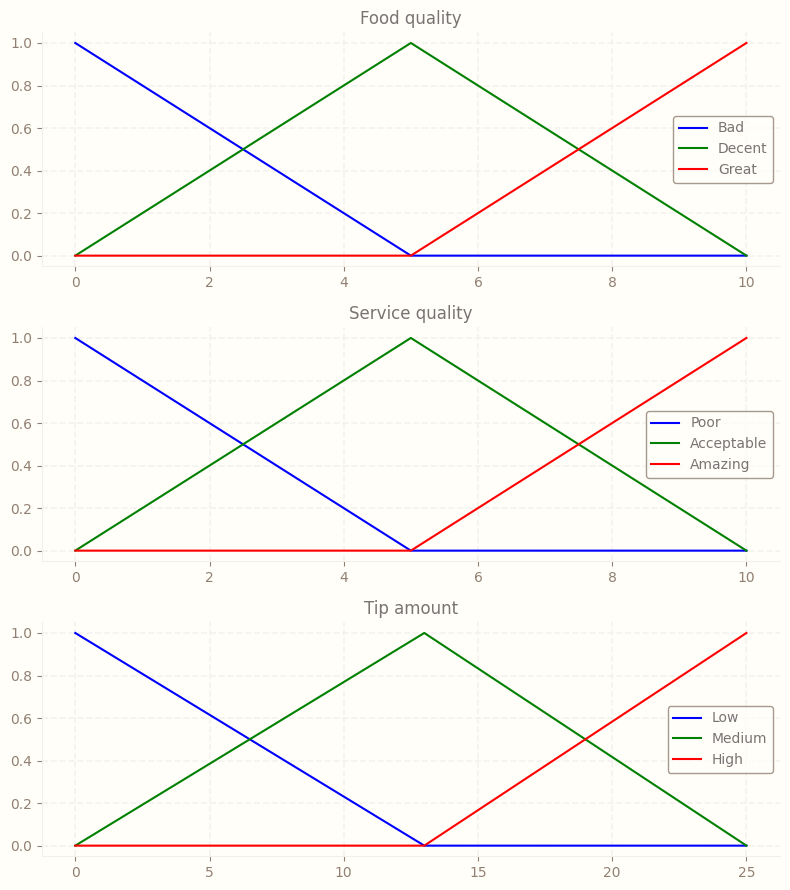

In [11]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip = np.arange(0, 26, 1)

# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

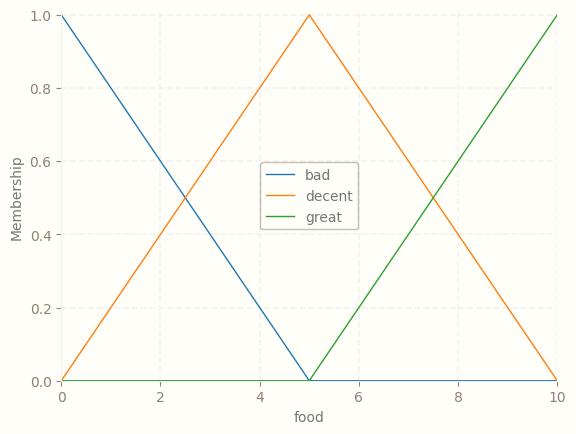

In [12]:
food.view()

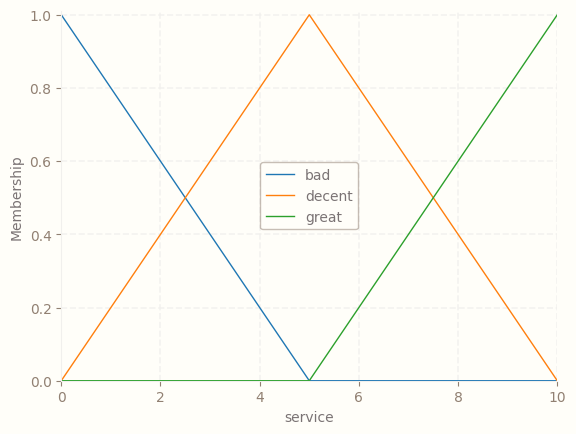

In [13]:
service.view()

In [14]:
def fxn():
    warnings.warn("deprecated", DeprecationWarning)


with warnings.catch_warnings(record=True) as ws:
    warnings.simplefilter("always")
    fxn()

    print("nombre de warnings :", len(ws))

    for i, w in enumerate(ws):
        print("warning {0} : {1}".format(i, w))

nombre de warnings : 1
warning 0 : {message : DeprecationWarning('deprecated'), category : 'DeprecationWarning', filename : '/var/folders/14/8cfdj8xx3cz4cvvswzmnv11w0000gn/T/ipykernel_16696/2978958439.py', lineno : 2, line : None}


In [15]:
v = torch.tensor([1, 2, 3, 4, 5, 6])

tabulation = Form_Generator()
tabulation.heading_printer("Default one-dimensional tensor")

statements = ["v = torch.tensor([1, 2, 3, 4, 5, 6])"]
tabulation.statement_generator(statements)

variables = ["v"]
values = [str(v)]
tabulation.variable_generator(variables, values)

NameError: name 'torch' is not defined

In [ ]:
tabulation = Form_Generator()
tabulation.heading_printer("Basic information of default 1D tensor")

expressions = ["v.dtype", "v.type()", "type(v)", "v.size()"]
results = [str(v.dtype), str(v.type()), str(type(v)), str(v.size())]
tabulation.expression_generator(expressions, results)

In [ ]:
tabulation = Form_Generator()
tabulation.heading_printer("Element selection of 1D tensor")

expressions = ["v[0]", "v[-1]"]
results = [str(v[0]), str(v[-1])]
tabulation.expression_generator(expressions, results)

In [ ]:
tabulation = Form_Generator()
tabulation.heading_printer("Segment slicing of 1D tensor")

expressions = ["v[1:-1]", "v[1::2]"]
results = [str(v[1:-1]), str(v[1::2])]
tabulation.expression_generator(expressions, results)

In [ ]:
f = torch.FloatTensor([1, 2, 3, 4, 5, 6])

tabulation = Form_Generator()
tabulation.heading_printer("Float one-dimensional tensor")

statements = ["f = torch.FloatTensor([1, 2, 3, 4, 5, 6])"]
tabulation.statement_generator(statements)

variables = ["f"]
values = [str(f)]
tabulation.variable_generator(variables, values)

In [ ]:
tabulation = Form_Generator()
tabulation.heading_printer("Basic information of float 1D tensor")

expressions = ["f.dtype", "f.type()", "type(f)", "f.size()"]
results = [str(f.dtype), str(f.type()), str(type(f)), str(f.size())]
tabulation.expression_generator(expressions, results)

In [ ]:
tabulation = Form_Generator()
tabulation.heading_printer("Reshaping of 1D tensor")

expressions = [
    "v.view(6)", "v.view(1, 6)", "v.view(6, 1)", "v.view(3, 2)",
    "v.view(3, -1)"
]
results = [
    str(v.view(6)),
    str(v.view(1, 6)),
    str(v.view(6, 1)),
    str(v.view(3, 2)),
    str(v.view(3, -1))
]
tabulation.expression_generator(expressions, results)

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])
tensor_cnv = torch.from_numpy(a)
numpy_cnv = tensor_cnv.numpy()

tabulation = Form_Generator()
tabulation.heading_printer("Conversion between array and tensor")

statements = [
    """
a = np.array([1, 2, 3, 4, 5, 6])
tensor_cnv = torch.from_numpy(a)
numpy_cnv = tensor_cnv.numpy()
"""
]
tabulation.statement_generator(statements)

variables = ["a", "tensor_cnv", "numpy_cnv"]
values = [str(a), str(tensor_cnv), str(numpy_cnv)]
tabulation.variable_generator(variables, values)

expressions = [
    "tensor_cnv.dtype", "tensor_cnv.type()", "type(tensor_cnv)",
    "numpy_cnv.dtype", "type(numpy_cnv)"
]
results = [
    str(tensor_cnv.dtype),
    str(tensor_cnv.type()),
    str(type(tensor_cnv)),
    str(numpy_cnv.dtype),
    str(type(numpy_cnv))
]
tabulation.expression_generator(expressions, results)

## Vector Operations

In [ ]:
t_one = torch.tensor([1, 2, 3])
t_two = torch.tensor([1, 2, 3])

tabulation = Form_Generator()
tabulation.heading_printer("Original tensors")

statements = [
    """
t_one = torch.tensor([1, 2, 3])
t_two = torch.tensor([1, 2, 3])
"""
]
tabulation.statement_generator(statements)

variables = ["t_one", "t_two"]
values = [str(t_one), str(t_two)]
tabulation.variable_generator(variables, values)

In [ ]:
tabulation = Form_Generator()
tabulation.heading_printer("Simple operations")

expressions = [
    "t_one + t_two", "t_one - t_two", "t_one * t_two", "t_one / t_two",
    "t_one * 5"
]
results = [
    str(t_one + t_two),
    str(t_one - t_two),
    str(t_one * t_two),
    str(t_one / t_two),
    str(t_one * 5)
]
tabulation.expression_generator(expressions, results)

In [ ]:
dot_product = torch.dot(t_one, t_two)

tabulation = Form_Generator()
tabulation.heading_printer("Dot product of tensors")

statements = ["dot_product = torch.dot(t_one, t_two)"]
tabulation.statement_generator(statements)

variables = ["dot_product"]
values = [str(dot_product)]
tabulation.variable_generator(variables, values)

In [ ]:
x = torch.linspace(0, 10, 5)

tabulation = Form_Generator()
tabulation.heading_printer("Creation of arithmetic sequence in 1D tensor")

statements = ["x = torch.linspace(0, 10, 5)"]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

In [ ]:
y = torch.exp(x)

tabulation = Form_Generator()
tabulation.heading_printer("Exponentiation of tensor elements")

statements = ["y = torch.exp(x)"]
tabulation.statement_generator(statements)

variables = ["y"]
values = [str(y)]
tabulation.variable_generator(variables, values)

In [ ]:
colors = calm_color_generator(2)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 2)

fig, axs = plt.subplots(1, 2, sharey=True)

x = torch.linspace(0, 10, 5)
y = torch.exp(x)
axs[0].plot(x.numpy(), y.numpy(), c=colors.pop(0))
axs[0].set_title("Arithmetic sequence of 5 elements", loc="center", pad=15)

x = torch.linspace(0, 10, 100)
y = torch.exp(x)
axs[1].plot(x.numpy(), y.numpy(), c=colors.pop(0))
axs[1].set_title("Arithmetic sequence of 100 elements", loc="center", pad=15)

for ax in axs.flat:
    ax.set(xlabel="arithmetic sequence", ylabel="result of exponentiation")
    ax.tick_params(axis="y", labelrotation=90)
    ax.label_outer()

fig.suptitle("Visual Comparison of Exponentiation",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

In [ ]:
def csc(x):
    return 1 / torch.sin(x)


def sec(x):
    return 1 / torch.cos(x)


def cot(x):
    return 1 / torch.tan(x)


colors = calm_color_generator(6)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 2 * 3)

value_list_1 = [0, torch.pi, 2 * torch.pi, 3 * torch.pi]
value_list_2 = [i - .5 * torch.pi for i in value_list_1][1:]
color_list_1 = calm_color_generator(4)
color_list_2 = calm_color_generator(3)
label_list_1 = ["0 π", "1 π", "2 π", "3 π"]
label_list_2 = ["0.5 π", "1.5 π", "2.5 π"]

fig, axs = plt.subplots(3, 2, sharex=True)

x = torch.linspace(0, 10, 100)
y = torch.sin(x)
axs[0, 0].plot(x.numpy(), y.numpy(), c=colors.pop(0))
axs[0, 0].set_title("Sine = opposite / hypotenuse", loc="center", pad=15)

y = csc(x)
axs[0, 1].plot(x.numpy(), y.numpy(), c=colors.pop(0))
axs[0, 1].set_title("Cosecant = hypotenuse / opposite", loc="center", pad=15)

y = torch.cos(x)
axs[1, 0].plot(x.numpy(), y.numpy(), c=colors.pop(0))
axs[1, 0].set_title("Cosine = adjacent / hypotenuse", loc="center", pad=15)

y = sec(x)
axs[1, 1].plot(x.numpy(), y.numpy(), c=colors.pop(0))
axs[1, 1].set_title("Secant = hypotenuse / adjacent", loc="center", pad=15)

y = torch.tan(x)
axs[2, 0].plot(x.numpy(), y.numpy(), c=colors.pop(0))
axs[2, 0].set_title("Tangent = opposite / adjacent", loc="center", pad=15)

y = cot(x)
axs[2, 1].plot(x.numpy(), y.numpy(), c=colors.pop(0))
axs[2, 1].set_title("Cotangent = adjacent / opposite", loc="center", pad=15)

for ax in axs.flat:
    ax.set(xlabel="arithmetic sequence", ylabel="result of trigonometry")
    for x, c, label in zip(value_list_1, color_list_1, label_list_1):
        ax.axvline(x=x,
                   c=c,
                   label=label,
                   alpha=.2,
                   linestyle="--",
                   linewidth=3)
    for x, c, label in zip(value_list_2, color_list_2, label_list_2):
        ax.axvline(x=x, c=c, label=label, alpha=.2, linestyle=":", linewidth=3)

fig.suptitle("Visual Comparison of Trigonometry",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.legend(loc="lower right", borderpad=1, ncol=2)
plt.tight_layout()
plt.show()

## 2 Dimensional Tensors

In [ ]:
one_d = torch.arange(2, 7)

tabulation = Form_Generator()
tabulation.heading_printer("Creation of 1D tensor from defined interval")

statements = ["one_d = torch.arange(2, 7)"]
tabulation.statement_generator(statements)

variables = ["one_d"]
values = [str(one_d)]
tabulation.variable_generator(variables, values)

In [ ]:
one_d = torch.arange(2, 7, 2)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Creation of 1D tensor from defined interval and difference")

statements = ["one_d = torch.arange(2, 7, 2)"]
tabulation.statement_generator(statements)

variables = ["one_d"]
values = [str(one_d)]
tabulation.variable_generator(variables, values)

In [ ]:
one_d = torch.arange(0, 9)
two_d = one_d.view(3, 3)

tabulation = Form_Generator()
tabulation.heading_printer("Creation of 2D tensor from 1D tensor")

statements = ["""
one_d = torch.arange(0, 9)
two_d = one_d.view(3, 3)
"""]
tabulation.statement_generator(statements)

variables = ["one_d", "two_d"]
values = [str(one_d), str(two_d)]
tabulation.variable_generator(variables, values)

expressions = ["one_d.dim()", "two_d.dim()"]
results = [str(one_d.dim()), str(two_d.dim())]
tabulation.expression_generator(expressions, results)

In [ ]:
tabulation = Form_Generator()
tabulation.heading_printer("Element selection of 2D tensor")

expressions = ["two_d[0, 0]", "two_d[1, 2]", "two_d[-2, -1]"]
results = [str(two_d[0, 0]), str(two_d[1, 2]), str(two_d[-2, -1])]
tabulation.expression_generator(expressions, results)

In [ ]:
tabulation = Form_Generator()
tabulation.heading_printer("Segment slicing of 2D tensor")

expressions = [
    "two_d[0]", "two_d[0, ]", "two_d[:, 0]", "two_d[:-1, ]", "two_d[:, ::2]"
]
results = [
    str(two_d[0]),
    str(two_d[0, ]),
    str(two_d[:, 0]),
    str(two_d[:-1, ]),
    str(two_d[:, ::2])
]
tabulation.expression_generator(expressions, results)

In [ ]:
three_d_1 = torch.arange(18).view(2, 3, 3)
three_d_2 = torch.arange(18).view(3, 2, 3)
three_d_3 = torch.arange(18).view(3, 3, 2)

tabulation = Form_Generator()
tabulation.heading_printer("Creation of 3D tensor from 1D tensor")

statements = [
    """
three_d_1 = torch.arange(18).view(2, 3, 3)
three_d_2 = torch.arange(18).view(3, 2, 3)
three_d_3 = torch.arange(18).view(3, 3, 2)
"""
]
tabulation.statement_generator(statements)

variables = ["three_d_1", "three_d_2", "three_d_3"]
values = [str(three_d_1), str(three_d_2), str(three_d_3)]
tabulation.variable_generator(variables, values)

expressions = [
    "three_d_2.size()", "three_d_2.size(dim=0)", "three_d_2.size(dim=1)",
    "three_d_2.size(dim=2)", "three_d_2.dim()"
]
results = [
    str(three_d_2.size()),
    str(three_d_2.size(dim=0)),
    str(three_d_2.size(dim=1)),
    str(three_d_2.size(dim=2)),
    str(three_d_2.dim()),
]
tabulation.expression_generator(expressions, results)

## Slicing 3D Tensors

In [ ]:
tabulation = Form_Generator()
tabulation.heading_printer("Element selection of 3D tensor")

expressions = [
    "three_d_1[1, 1, 1]", "three_d_2[1, 1, 1]", "three_d_3[1, 1, 1]"
]
results = [
    str(three_d_1[1, 1, 1]),
    str(three_d_2[1, 1, 1]),
    str(three_d_3[1, 1, 1])
]
tabulation.expression_generator(expressions, results)

In [ ]:
tabulation = Form_Generator()
tabulation.heading_printer("Segment slicing of 3D tensor")

expressions = [
    "three_d_2[1]", "three_d_2[1, :, :]", "three_d_2[:, :-1, :]",
    "three_d_2[:, :, ::2]"
]
results = [
    str(three_d_2[1]),
    str(three_d_2[1, :, :]),
    str(three_d_2[:, :-1, :]),
    str(three_d_2[:, :, ::2])
]
tabulation.expression_generator(expressions, results)

## Matrix Multiplication

In [ ]:
mat_a = torch.tensor([0, 3, 5, 5, 5, 2]).view(2, 3)
mat_b = torch.tensor([3, 4, 3, -2, 4, -2]).view(3, 2)

tabulation = Form_Generator()
tabulation.heading_printer("Matrix multiplication of tensors")

statements = [
    """
mat_a = torch.tensor([0, 3, 5, 5, 5, 2]).view(2, 3)
mat_b = torch.tensor([3, 4, 3, -2, 4, -2]).view(3, 2)
"""
]
tabulation.statement_generator(statements)

variables = ["mat_a", "mat_b"]
values = [str(mat_a), str(mat_b)]
tabulation.variable_generator(variables, values)

expressions = ["torch.matmul(mat_a, mat_b)", "mat_a @ mat_b"]
results = [str(torch.matmul(mat_a, mat_b)), str(mat_a @ mat_b)]
tabulation.expression_generator(expressions, results)

## Gradient with PyTorch

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = 9 * x**4 + 2 * x**3 + 3 * x**2 + 6 * x + 1
y.backward()

tabulation = Form_Generator()
tabulation.heading_printer("Calculation of total derivative")

statements = [
    """
x = torch.tensor(2.0, requires_grad=True)
y = 9 * x**4 + 2 * x**3 + 3 * x**2 + 6 * x + 1
y.backward()
"""
]
tabulation.statement_generator(statements)

variables = ["x", "y"]
values = [str(x), str(y)]
tabulation.variable_generator(variables, values)

expressions = ["x.grad"]
results = [str(x.grad)]
tabulation.expression_generator(expressions, results)

In [ ]:
x = torch.tensor(1.0, requires_grad=True)
z = torch.tensor(2.0, requires_grad=True)
y = x**2 + z**3
y.backward()

tabulation = Form_Generator()
tabulation.heading_printer("Calculation of partial derivative")

statements = [
    """
x = torch.tensor(1.0, requires_grad=True)
z = torch.tensor(2.0, requires_grad=True)
y = x**2 + z**3
y.backward()
"""
]
tabulation.statement_generator(statements)

variables = ["x", "z", "y"]
values = [str(x), str(z), str(y)]
tabulation.variable_generator(variables, values)

expressions = ["x.grad", "z.grad"]
results = [str(x.grad), str(z.grad)]
tabulation.expression_generator(expressions, results)